In [2]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

In [3]:
# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)

def linfit(x, a, b):
    '''
        linear function
    '''
    return a + b * x


In [4]:
x, errx, y, erry = np.loadtxt('calibration_data.txt', unpack=True)

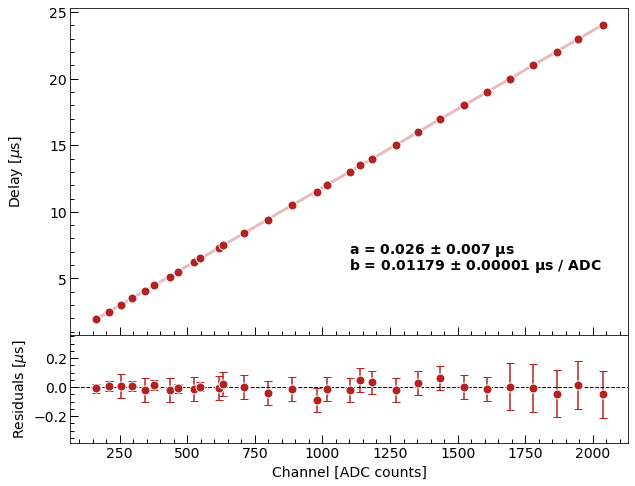

In [8]:
# fit
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

pms, cov = op.curve_fit(linfit, x, y, sigma=erry)

# residuals and relative error
y_th = linfit(x, *pms)
res = y - y_th 
rel_err = 100 * (res / y_th)

domain = np.linspace(min(x), max(x), 50)

ax1.plot(domain, linfit(domain, *pms), color='firebrick', ls='-', alpha=0.3, lw=3)
ax1.errorbar(x, y, yerr=erry,xerr=errx, marker='o', mec='white', markersize=9, 
                color='firebrick', linestyle='none', capsize=4)

ax2.errorbar(x, res, yerr=erry, xerr=errx,marker='o', mec='white', markersize=9, 
                color='firebrick', linestyle='none', capsize=4)
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')

# ticks
set_ticks(ax1, 250, 5)
set_ticks(ax2, 250, 0.2)

ax2.set_ylim(np.min(res) - 0.3, np.max(res) + 0.3)

# labels
ax2.set_xlabel('Channel [ADC counts]', fontsize=14)

ax1.set_ylabel('Delay [$\mu$s]', fontsize=14, labelpad=24)
ax2.set_ylabel('Residuals [$\mu$s]', fontsize=14)

a, b, err_a, err_b = pms[0], pms[1], np.sqrt(cov[0,0]), np.sqrt(cov[1,1])

# legend
ax1.text(0.5,0.25, 'a = %1.3f $\\mathbf{\\pm}$ %1.3f $\\mathbf{\\mu}$s ' % (a,err_a), 
        fontweight = 'bold',fontsize = 14,  transform=ax1.transAxes)
ax1.text(0.5,0.2, 'b = %1.5f $\\mathbf{\\pm}$ %1.5f $\\mathbf{\\mu}$s / ADC ' % (b,err_b), 
        fontweight = 'bold',fontsize = 14,  transform=ax1.transAxes)

fig.subplots_adjust(hspace=0)
fig.savefig('tac_calibration.pdf', dpi = 200)
plt.show()